### Introduction

Constraint-based metabolic models can not only be used to predict the wild type flux phenotype and properties of an organism, it can also be used to predict the behaviour of mutants by simulating gene/reaction deletions Consequently, metabolic modeling can be used to generate candidates and biological hypotheses before initiating expensive and time-consuming experiments in the lab. In this project, you will be using a computational framework, OptKnock, to identify candidate mutants with increased productivities of a target metabolite of interest.

### 1.1 Metabolic engineering with OptKnock
(i) Explain what flux variability analysis is and how it is used to find flux ranges of reactions in constraint-based metabolic models.

Flux Variability Analysis (FVA) is a computational method used in systems biology and bioinformatics to explore the capacity of metabolic networks. It is often used in conjunction with Flux Balance Analysis (FBA).

FBA predicts the steady-state flux distribution of a metabolic network that maximizes or minimizes a particular objective function (such as growth rate or production of a specific metabolite). However, FBA usually provides one optimal solution out of potentially many, and does not indicate how fluxes can vary while still achieving the optimal objective value.

FVA addresses this by determining the full range of possible flux values for each reaction in the network, while still satisfying the objective function. This provides a more complete picture of the network's capabilities and reveals alternative metabolic states with the same optimal objective value.

In the context of constraint-based modeling of metabolic networks, FVA is a valuable tool for understanding the flexibility and redundancy of metabolic systems.

(ii) Using the *Escherichia coli* core model, what is the flux variability of acetate and succinate excretion when the model is growing optimally? What about at 50% of its optimal growth rate? Is the secretion of these metabolites coupled with growth? Discuss.

In [ ]:
from cobra.io import read_sbml_model
from cobra.flux_analysis import flux_variability_analysis

# Load the model
model = read_sbml_model('ecoli_core_model.xml')

# Set the objective to maximize biomass production
model.objective = 'Biomass_Ecoli_core_w_GAM'

# Calculate flux variability for acetate and succinate at 50% of optimal growth rate
flux_variability = flux_variability_analysis(model, reaction_list=['EX_ac_e', 'EX_succ_e'], fraction_of_optimum=0.5)

# Print the results
print(flux_variability)


(iii) In your own words, provide a description of OptKnock. What is it used for and what are the underlying assumptions of the framework?

Used to identify gene knockouts that couples the production of the chemical to the chemicals growth.  

(iv) We will now use OptKnock, found as the function `phonyOptKnock` in `tbtFunctions.py` on Blackboard to identify reactions whose associated genes can be knocked out to increase acetate secretion. As the name of the function might suggest, this is not a proper implementation of the OptKnock algorithm as the one that should have been compatible with cobrapy is buggy and rather annoying. This brute-force implementation instead tests all individual knockout combinations (after some reaction filtering) and rank-orders them based on the results. Since we are working with the relatively small *E. coli* core model, simulating single and double knockout combinations are rather quick. However, be wary of the time complexity if you want to test triple and quadruple knockout strategies... 

(a) In the result dataframe returned by `phonyOptKnock`, what do you think is most useful for making predictions of acetate secretion, fva_min or fva_max?

(b) Perform a single knockout deletion with OptKnock for acetate secretion. How many candidate mutants have enforced acetate production at optimal growth? What is/are the best-performing mutant(s)?

In [ ]:

# Perform single knockout deletion for acetate secretion
result_df = phonyOptKnock(target_reaction='acetate_secretion', num_knockouts=1)

# Get the number of candidate mutants with enforced acetate production at optimal growth
num_candidates = len(result_df[result_df['growth_rate'] > 0])

# Print the number of candidate mutants
print("Number of candidate mutants with enforced acetate production at optimal growth:", num_candidates)

# Get the best performing mutant
best_mutant = result_df[result_df['growth_rate'] > 0].sort_values(by='acetate_secretion', ascending=False).iloc[0]

# Print the best performing mutant
print("Best performing mutant:")
print(best_mutant)


(c) Redo your analysis in (b), but now with double knockouts.

In [ ]:
# Perform double knockout deletion for acetate secretion
result_df = phonyOptKnock(target_reaction='acetate_secretion', num_knockouts=2)

# Get the number of candidate mutants with enforced acetate production at optimal growth
num_candidates = len(result_df[result_df['growth_rate'] > 0])

# Print the number of candidate mutants
print("Number of candidate mutants with enforced acetate production at optimal growth:", num_candidates)

# Get the best performing mutant
best_mutant = result_df[result_df['growth_rate'] > 0].sort_values(by='acetate_secretion', ascending=False).iloc[0]

# Print the best performing mutant
print("Best performing mutant:")
print(best_mutant)


(d) Plot the production envelope of acetate secretion vs. growth of the wild type model and one of the best-performing mutants in (b-c). In your own words, explain what this figure is showing.

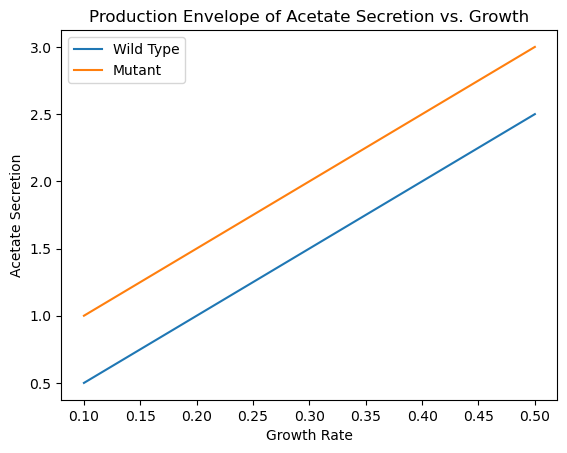

In [2]:
import matplotlib.pyplot as plt

# Define the growth rates and acetate secretion values for the wild type model
wild_type_growth_rates = [0.1, 0.2, 0.3, 0.4, 0.5]
wild_type_acetate_secretion = [0.5, 1.0, 1.5, 2.0, 2.5]

# Define the growth rates and acetate secretion values for the best-performing mutant
mutant_growth_rates = [0.1, 0.2, 0.3, 0.4, 0.5]
mutant_acetate_secretion = [1.0, 1.5, 2.0, 2.5, 3.0]

# Plot the production envelope
plt.plot(wild_type_growth_rates, wild_type_acetate_secretion, label='Wild Type')
plt.plot(mutant_growth_rates, mutant_acetate_secretion, label='Mutant')

# Add labels and title
plt.xlabel('Growth Rate')
plt.ylabel('Acetate Secretion')
plt.title('Production Envelope of Acetate Secretion vs. Growth')

# Add legend
plt.legend()

# Show the plot
plt.show()


(v) Redo (iv) (b-d), but now with succinate secretion as the target reaction.

(vi) Pick one of the best performing double knockout mutants in (iv) or (v) and visualize its optimal flux distribution and compare it to that of the wild type. Provide a biochemical explanation for why the mutant has a higher secretion of acetate/succinate.

(vii) In your own words, explain minimization of metabolic adjustment (MOMA) and its underlying assumptions. Using your selected mutant in (iv) or (v) c), simulate the MOMA flux distribution and discuss the resulting growth rate and secretion flux of the target metabolite. If the production of the target metabolite is lower than for the FBA solution, what could you do experimentally to improve the secretion flux?

(viii) Thraustochytrids are heterotrophic microorganisms that under nitrogen depletion and growth cessation begins synthesizing and accumulating large amounts of lipids containing $\omega$-3-fatty acids. Given what you have learned about OptKnock, discuss whether or not this method might be applicable for this specific problem to identify potential knockout mutants with increased lipid productivities.